# 휴폐업 ,액티브 중소법인 재무 보유 데이터 비교 EDA

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

In [8]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


In [35]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize = 8)
mpl.rc('xtick',labelsize = 8)
mpl.rc('ytick',labelsize = 8)

In [36]:
act_info = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\넘블 챌린지 데이터 (1)\분해된데이터\active_info_outside.csv')
clo_info = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\넘블 챌린지 데이터 (1)\분해된데이터\close_info.csv')

In [37]:
# EDA 전 columns name 변경해주도록 하겠습니다.

df_active = act_info.rename(columns= {'BIZ_NO':'사업자등록번호', 'CMP_PFIX_NM':'기업접두명', 'CMP_NM1':'기업명', 'CMP_SFIX_NM':'기업접미명', 'CMP_ENM':'기업영문명', 'BZ_TYP':'업종','CMP_SCL':'기업규모', 'PBCO_GB':'공기업구분',
                           'PSN_CORP_GB':'개인법인구분', 'HDOF_BR_GB':'본점지점구분', 'FR_IVST_CORP_YN':'국외투자법인여부', 'VENT_YN':'벤처기업여부', 'LIST_CD':'상장코드', 'IND_CD_ORDR':'산업코드차수', 'IND_CD1':'산업코드1', 'IND_CD2':'산업코드2', 'IND_CD3':'산업코드3','PB_ORG_TYP':'공공기관유형', 'MDSCO_PRTC_YN':'중견기업보호여부', 'HDOF_CMP_CD':'본점기업코드', 'ESTB_DATE':'설립일자', 'ESTB_GB':'설립구분', 'LIST_DATE':'상장일자', 'MN_BIZ_CONT':'주요사업내용', 'NATN_NM':'국가명', 'HOMEPAGE_URL':'홈페이지URL', 'CEO_NM':'대표자명','EMP_CNT':'직원수'})

df_down = clo_info.rename(columns= {'BIZ_NO':'사업자등록번호', 'CMP_PFIX_NM':'기업접두명', 'CMP_NM1':'기업명', 'CMP_SFIX_NM':'기업접미명', 'CMP_ENM':'기업영문명', 'BZ_TYP':'업종','CMP_SCL':'기업규모', 'PBCO_GB':'공기업구분',
                           'PSN_CORP_GB':'개인법인구분', 'HDOF_BR_GB':'본점지점구분', 'FR_IVST_CORP_YN':'국외투자법인여부', 'VENT_YN':'벤처기업여부', 'LIST_CD':'상장코드', 'IND_CD_ORDR':'산업코드차수', 'IND_CD1':'산업코드1', 'IND_CD2':'산업코드2', 'IND_CD3':'산업코드3','PB_ORG_TYP':'공공기관유형', 'MDSCO_PRTC_YN':'중견기업보호여부', 'HDOF_CMP_CD':'본점기업코드', 'ESTB_DATE':'설립일자', 'ESTB_GB':'설립구분', 'LIST_DATE':'상장일자', 'MN_BIZ_CONT':'주요사업내용', 'NATN_NM':'국가명', 'HOMEPAGE_URL':'홈페이지URL', 'CEO_NM':'대표자명','EMP_CNT':'직원수'})

# ['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP','CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN',
# 'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3','PB_ORG_TYP', 'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB',
# 'LIST_DATE', 'MN_BIZ_CONT', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM','EMP_CNT']
#
# '사업자등록번호','기업접두명', '기업명',/'기업접미명', /'기업영문명', /'업종',/ '기업규모',/ '공기업구분', '개인법인구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3', '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수'


필요 X : 기업규모 , 개인법인 구분 산업코드차수 (전부 같은 값이다)

### 업종

A : 신금(신용금고) -> 중소기업과 국민대중을 위한 자금을 융통하며 저축의 증대를 목적으로 하는 비영리적 조합조직에 의한 금융기관
B : 은행
C : 카드
F : 생보(생명보험) -> 보험사고 발생 객체가 피보험자의 생명 혹은 신체
I : 손보(손해보험) -> 보험사고 발생 객체가 피보험자의 재산
M : 제조
O : 기타금융
S : 증권
V : 창투(창업투자회사) -> 창의성과 사업성은 있으나 자금력이 부족한 창업자에게 투자 형태로 지원하는 벤처캐피털


In [38]:
act_info

,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,N,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,N,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,N,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,N,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,N,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28977,8048101453,NaN,제이앤인베스트먼트,NaN,J&INVESTMENT,M,2,2,1,1,...,N,NaN,20191206.0,1,NaN,경영컨설팅업,NaN,NaN,정경태,0.0
28978,8028701430,NaN,디앤엠개발,(주),"DNM Development Co., Ltd.",M,2,2,1,1,...,N,NaN,20200402.0,1,NaN,비주거용 건물 임대업,NaN,NaN,송성현,1.0
28979,4268501421,NaN,마스비 건축연구소,NaN,NaN,M,2,2,1,2,...,N,1220726.0,19900108.0,1,NaN,"BIM용역, 엔지니어링컨설팅",NaN,NaN,김태남,81.0
28980,6518502462,(주),건설레미콘의정부공장,NaN,"Construction Remicon Uijeongbu Factory Co., Ltd.",M,2,2,1,2,...,N,1583116.0,20220615.0,1,NaN,레미콘,NaN,NaN,이미성,26.0


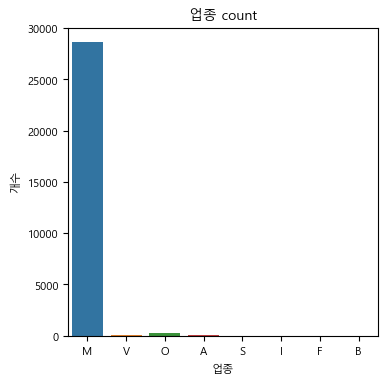

In [43]:
plt.figure(figsize=(4,4))
sns.countplot(data = df_active,x='업종')
plt.title('업종 count', fontsize=10)
plt.xlabel('업종', fontsize=8)
plt.ylabel('개수', fontsize=8)
#save_fig("업종_countplot")
plt.show()

대략 3만개의 기업이 전부 M 인 제조업을 하는 것을 볼 수 있다.

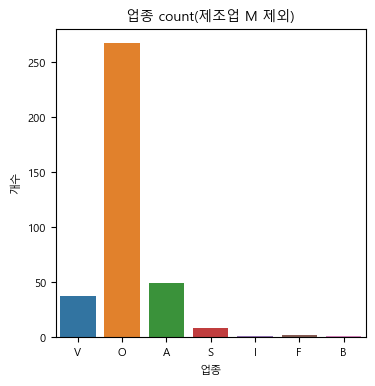

In [44]:
plt.figure(figsize=(4,4))
sns.countplot(data = df_active[df_active['업종'] != 'M'],x='업종')
plt.title('업종 count(제조업 M 제외)', fontsize=10)
plt.xlabel('업종', fontsize=8)
plt.ylabel('개수', fontsize=8)
#save_fig("업종_countplot_drop(M)")
plt.show()

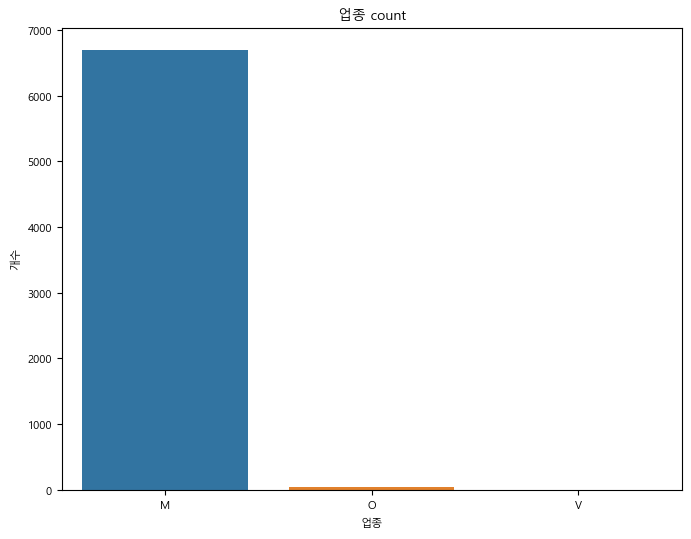

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(data = df_down,x='업종')
plt.title('업종 count', fontsize=10)
plt.xlabel('업종', fontsize=8)
plt.ylabel('개수', fontsize=8)
#save_fig("업종_countplot")
plt.show()

액티브 데이터 와는 다르게 휴폐업의 데이터의 경우 거의 대부분 제조업이고 업종도 3가지 밖에 없다.

### 기업규모

전부 2여서 없애도 됌

In [46]:
df_active['기업규모'].value_counts()

# plt.figure(figsize=(15,12))
# sns.countplot(data = df_active,x='기업규모')
# plt.title('업종 count(제조업 M 제외)', fontsize=20)
# plt.xlabel('업종', fontsize=16)
# plt.ylabel('개수', fontsize=16)
# #save_fig("업종_countplot_drop(M)")
# plt.show()

2    28982
Name: 기업규모, dtype: int64

In [ ]:
df_down['기업규모'].value_counts()

마찬가지로 휴폐업 데이터도 전부 2이다.

### 공기업 구분

In [ ]:
final['공기업구분'].value_counts() # 7개를 제외한 모든 기업이 사기업인듯


# 1 : 공기업
# 2 : 사기업

# 7개 기업 제외하고 모두 공기업이다.

In [ ]:


# 이와 대조적으로 휴폐업은 전부 2인 사기업이다. 공기업은 안망하겟짓..

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(data = final,x='공기업구분',hue='폐업 여부')
plt.title('공기업구분 count', fontsize=20)
plt.xlabel('공기업구분', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot")
plt.show()

### 본점지점구분

In [ ]:
final['본점지점구분'].value_counts()

# 1: 본점
# 2: 분점


In [ ]:
df_down['본점지점구분'].value_counts()

# 1: 본점
# 2: 분점


# 휴폐업에서도 역시 5200으로 본점이 더 많긴했다..

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(data = final,x='본점지점구분',hue='폐업여부')
plt.title('본점지점구분 count', fontsize=20)
plt.xlabel('본점지점구분', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot")
plt.show()

### 공기업구분, 본점지점구분, 국외투자법인여부, 벤처기업여부

In [ ]:
print(df_active['공기업구분'].value_counts())
print('\n')
# 1 : 공기업
# 2 : 사기업

print(df_active['본점지점구분'].value_counts())
print('\n')
# 1: 본점
# 2: 분점

print(df_active['국외투자법인여부'].value_counts())
print('\n')

print(df_active['벤처기업여부'].value_counts())

# Y : Yes
# N : No

In [ ]:
print(df_down['공기업구분'].value_counts())
print('\n')
# 1 : 공기업
# 2 : 사기업

print(df_down['본점지점구분'].value_counts())
print('\n')
# 1: 본점
# 2: 분점

print(df_down['국외투자법인여부'].value_counts())
print('\n')

print(df_down['벤처기업여부'].value_counts())

# Y : Yes
# N : No

### 상장코드

상장할때 받는 코드로 다 각기 다름
그리고 89개의 기업만 상장코드를 가지고 있어서 89개의 기업만 상장한듯

In [ ]:
df_active['상장코드'].value_counts()

In [ ]:
len(df_down['상장코드'].value_counts())

45 개의 회사만 상장한 것을 확인

### 산업코드

산업 코드에 따른 산업을 표준분류코드표를 확인하여 맵핑 필요

참고사이트 http://kssc.kostat.go.kr/ksscNew_web/kssc/common/ClassificationContent.do?gubun=1&strCategoryNameCode=001&categoryMenu=007&addGubun=no

In [ ]:
code_list = ['산업코드1','산업코드2', '산업코드3']

for i in code_list:
    print(df_active[i].value_counts())
    print('/////////')

### 공공기관유형

In [ ]:
df_active['공공기관유형'].value_counts()

#0 : 해당사항없음
#1 : 정부기구
#2 : 공기업/ 준정부기관
#3 : 지자체공단/ 공사

# 정부 기구는 없고 공기업이나 공단or공사가 조금 있는 것을 확인

In [ ]:
df_down['공공기관유형'].value_counts()

# 휴폐업 데이터는 다르게 공공기관 유형이 전부 0인 해당사항이 없었다.

### 중견기업보호여부

In [ ]:
df_active['중견기업보호여부'].value_counts()

# 대부분의 기업이 중견기업 보호를 받지 않지만
# 단 98개의 기업만이 보호를 받는다.

In [ ]:
df_down['중견기업보호여부'].value_counts()

# 11개의 기업만이 중견기업의 보호를 받음

### 설립일자

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(data = df_active,x='설립일자')
plt.title('설립일자', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(19600000)
#save_fig("업종_countplot_drop(M)")
plt.show()

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(data = df_down,x='설립일자')
plt.title('설립일자', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(19600000)
#save_fig("업종_countplot_drop(M)")
plt.show()

위의 두 그래프를 비교했을떄 비교적 최근에 생긴 기업들이 휴폐업이 많은 것을 확인

### 설립일자

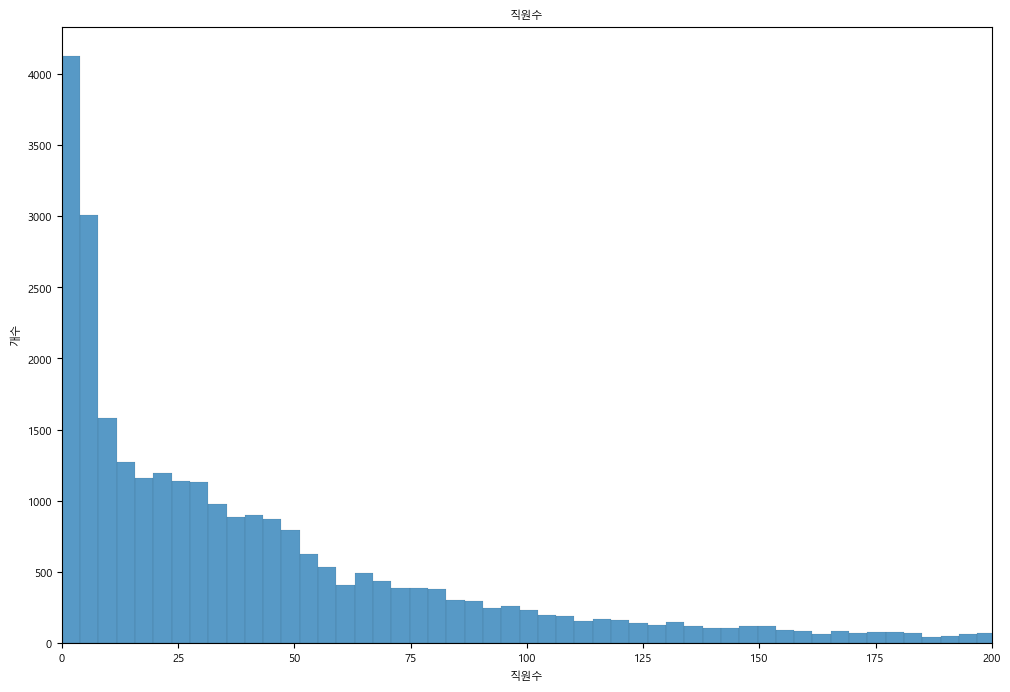

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(data = df_active, x='직원수')
plt.title('직원수', fontsize=8)
plt.xlabel('직원수', fontsize=8)
plt.ylabel('개수', fontsize=8)
plt.xlim(0,200)
#save_fig("업종_countplot_drop(M)")
plt.show()

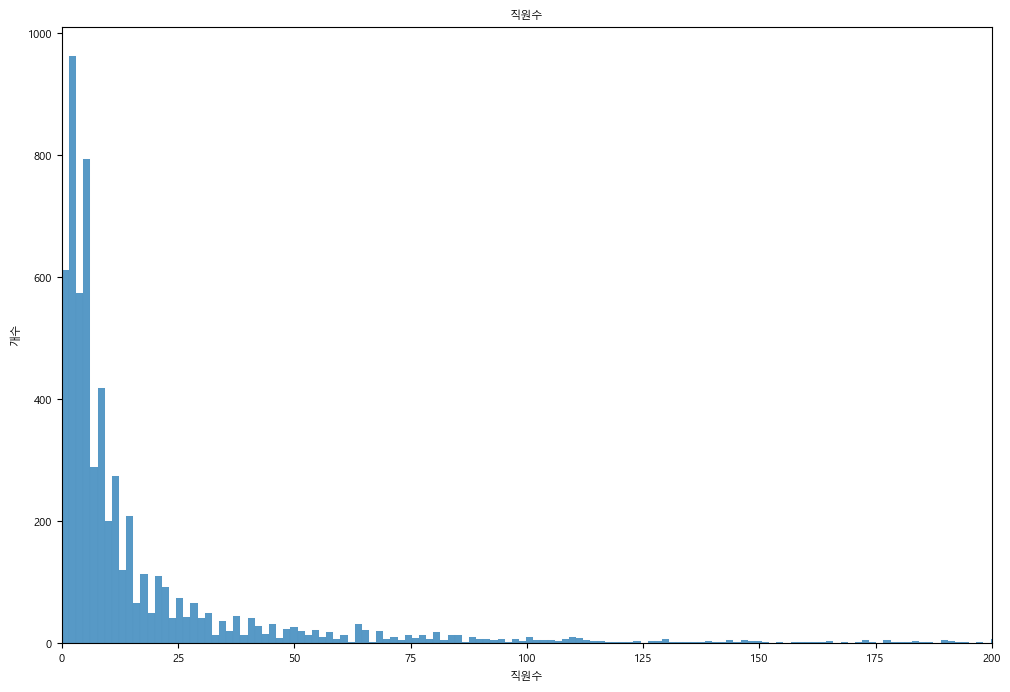

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(data = df_down, x='직원수')
plt.title('직원수', fontsize=8)
plt.xlabel('직원수', fontsize=8)
plt.ylabel('개수', fontsize=8)
plt.xlim(0,200)
#save_fig("업종_countplot_drop(M)")
plt.show()

확실히 직원수가 적은 기업이 많은 것을 확인할 수 있다.

데이터에 이상치가 있는 듯

In [ ]:
col_list = ['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', '공기업구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드1','산업코드2', '산업코드3' , '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수']

In [ ]:
for i in col_list:
    print(df_active[i].value_counts())
    print('/////////')

In [ ]:
col_list = ['업종', '공기업구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드1','산업코드2', '산업코드3', '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수']


# 최종 데이터 EDA

In [55]:
final = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\company_info_final.csv',encoding = 'cp949')

In [58]:
final = final.drop(columns=['사업자등록번호','기업명','설립일자'])

In [61]:
final.columns

Index(['공기업구분', '개인법인구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드1',
       '공공기관유형', '중견기업보호여부', '본점기업코드', '설립구분', '국가명', '직원수', '폐업여부',
       '산업코드 대분류', '구글 검색량', '설립일자(day)'],
      dtype='object')

<AxesSubplot: xlabel='국가명', ylabel='count'>

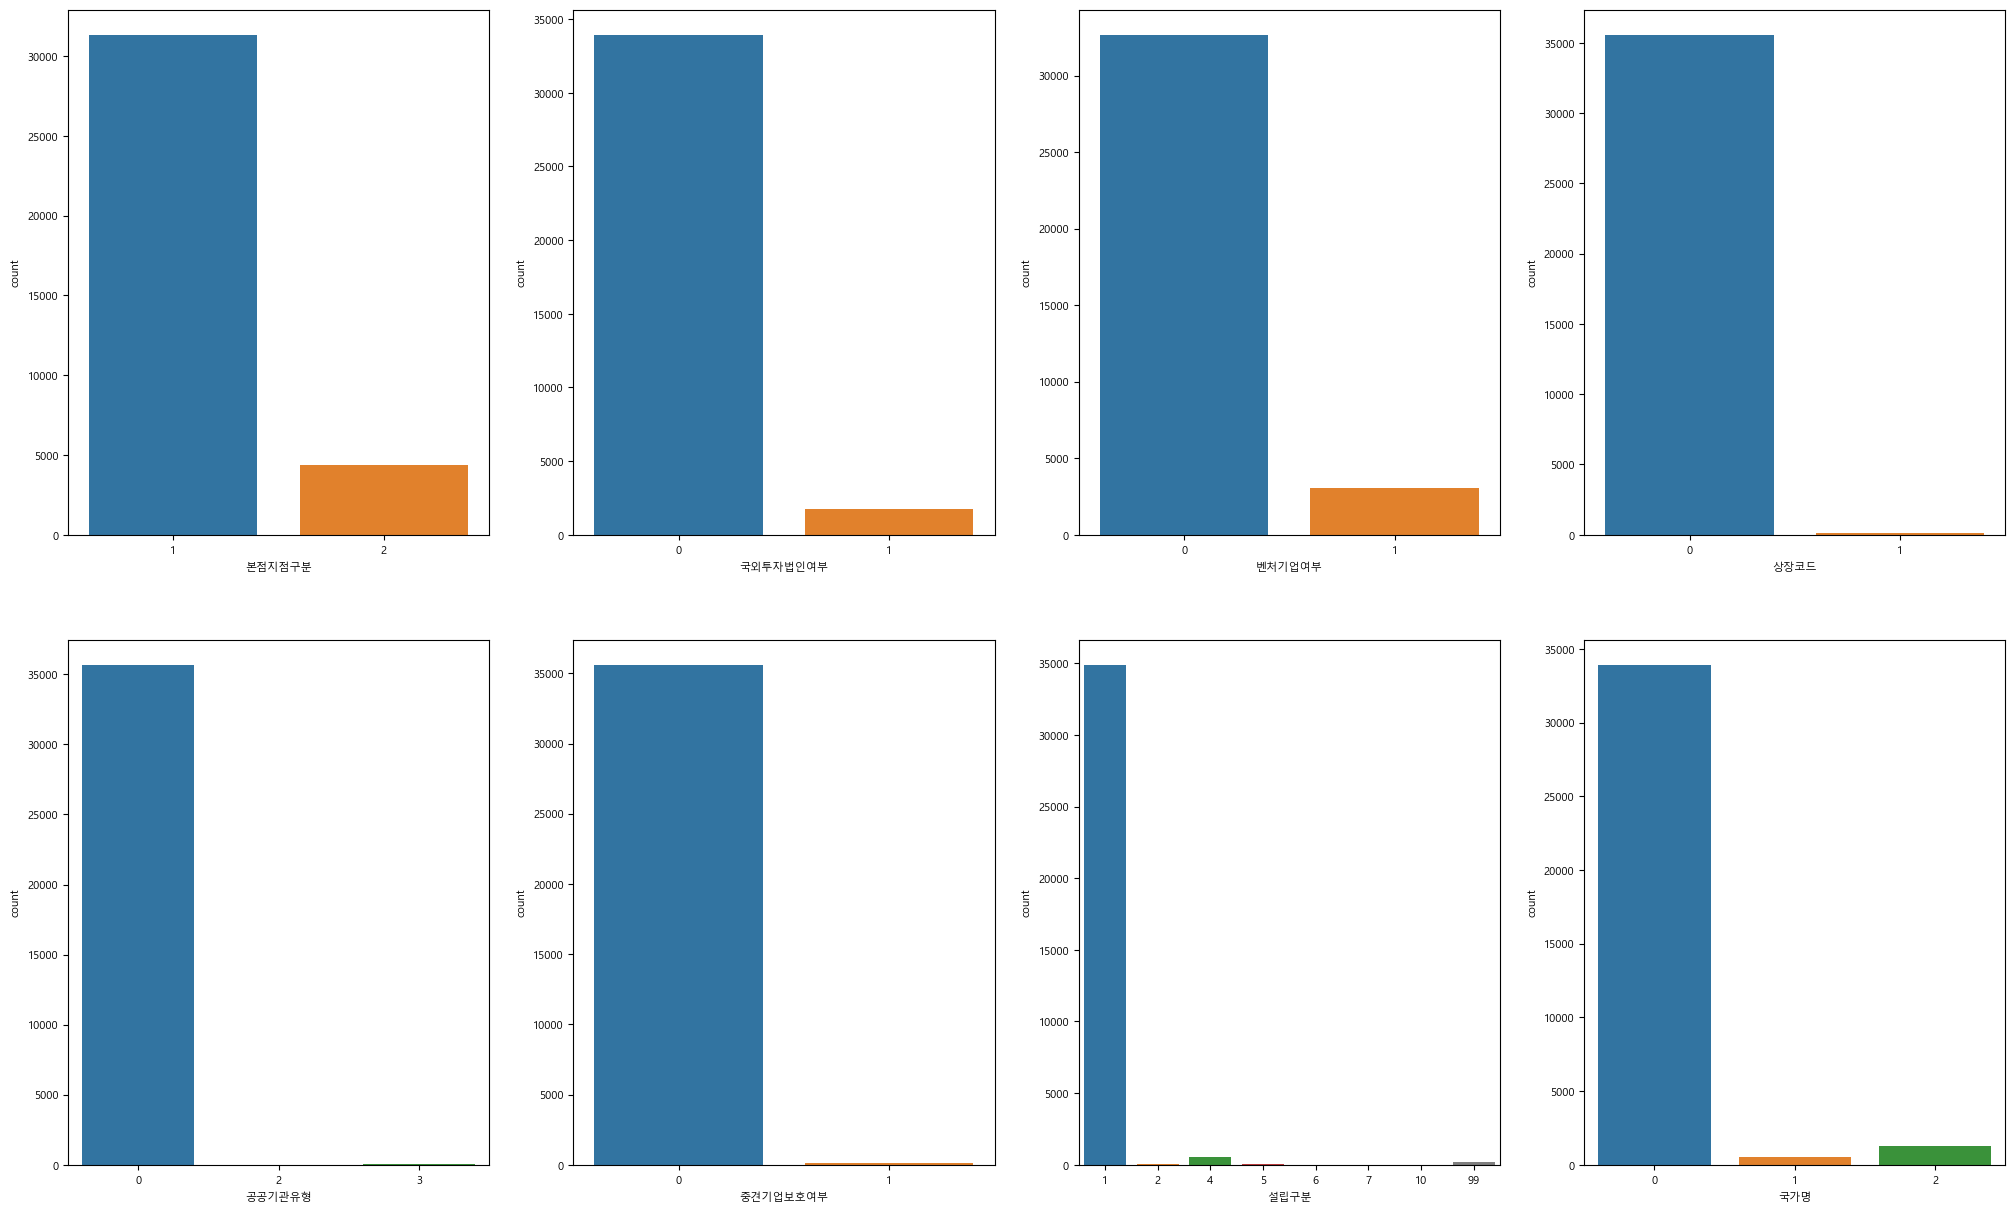

In [72]:
fig = plt.figure(figsize=(25, 15))
plt.subplot(2, 4, 1)
sns.countplot(data=final, x=final.columns[2])
plt.subplot(2, 4, 2)
sns.countplot(data=final, x=final.columns[3])
plt.subplot(2, 4, 3)
sns.countplot(data=final, x=final.columns[4])
plt.subplot(2, 4, 4)
sns.countplot(data=final, x=final.columns[5])
plt.subplot(2, 4, 5)
sns.countplot(data=final, x=final.columns[7])
plt.subplot(2, 4, 6)
sns.countplot(data=final, x=final.columns[8])
plt.subplot(2, 4, 7)
sns.countplot(data=final, x=final.columns[10])
plt.subplot(2, 4, 8)
sns.countplot(data=final, x=final.columns[11])

<AxesSubplot: xlabel='국가명', ylabel='count'>

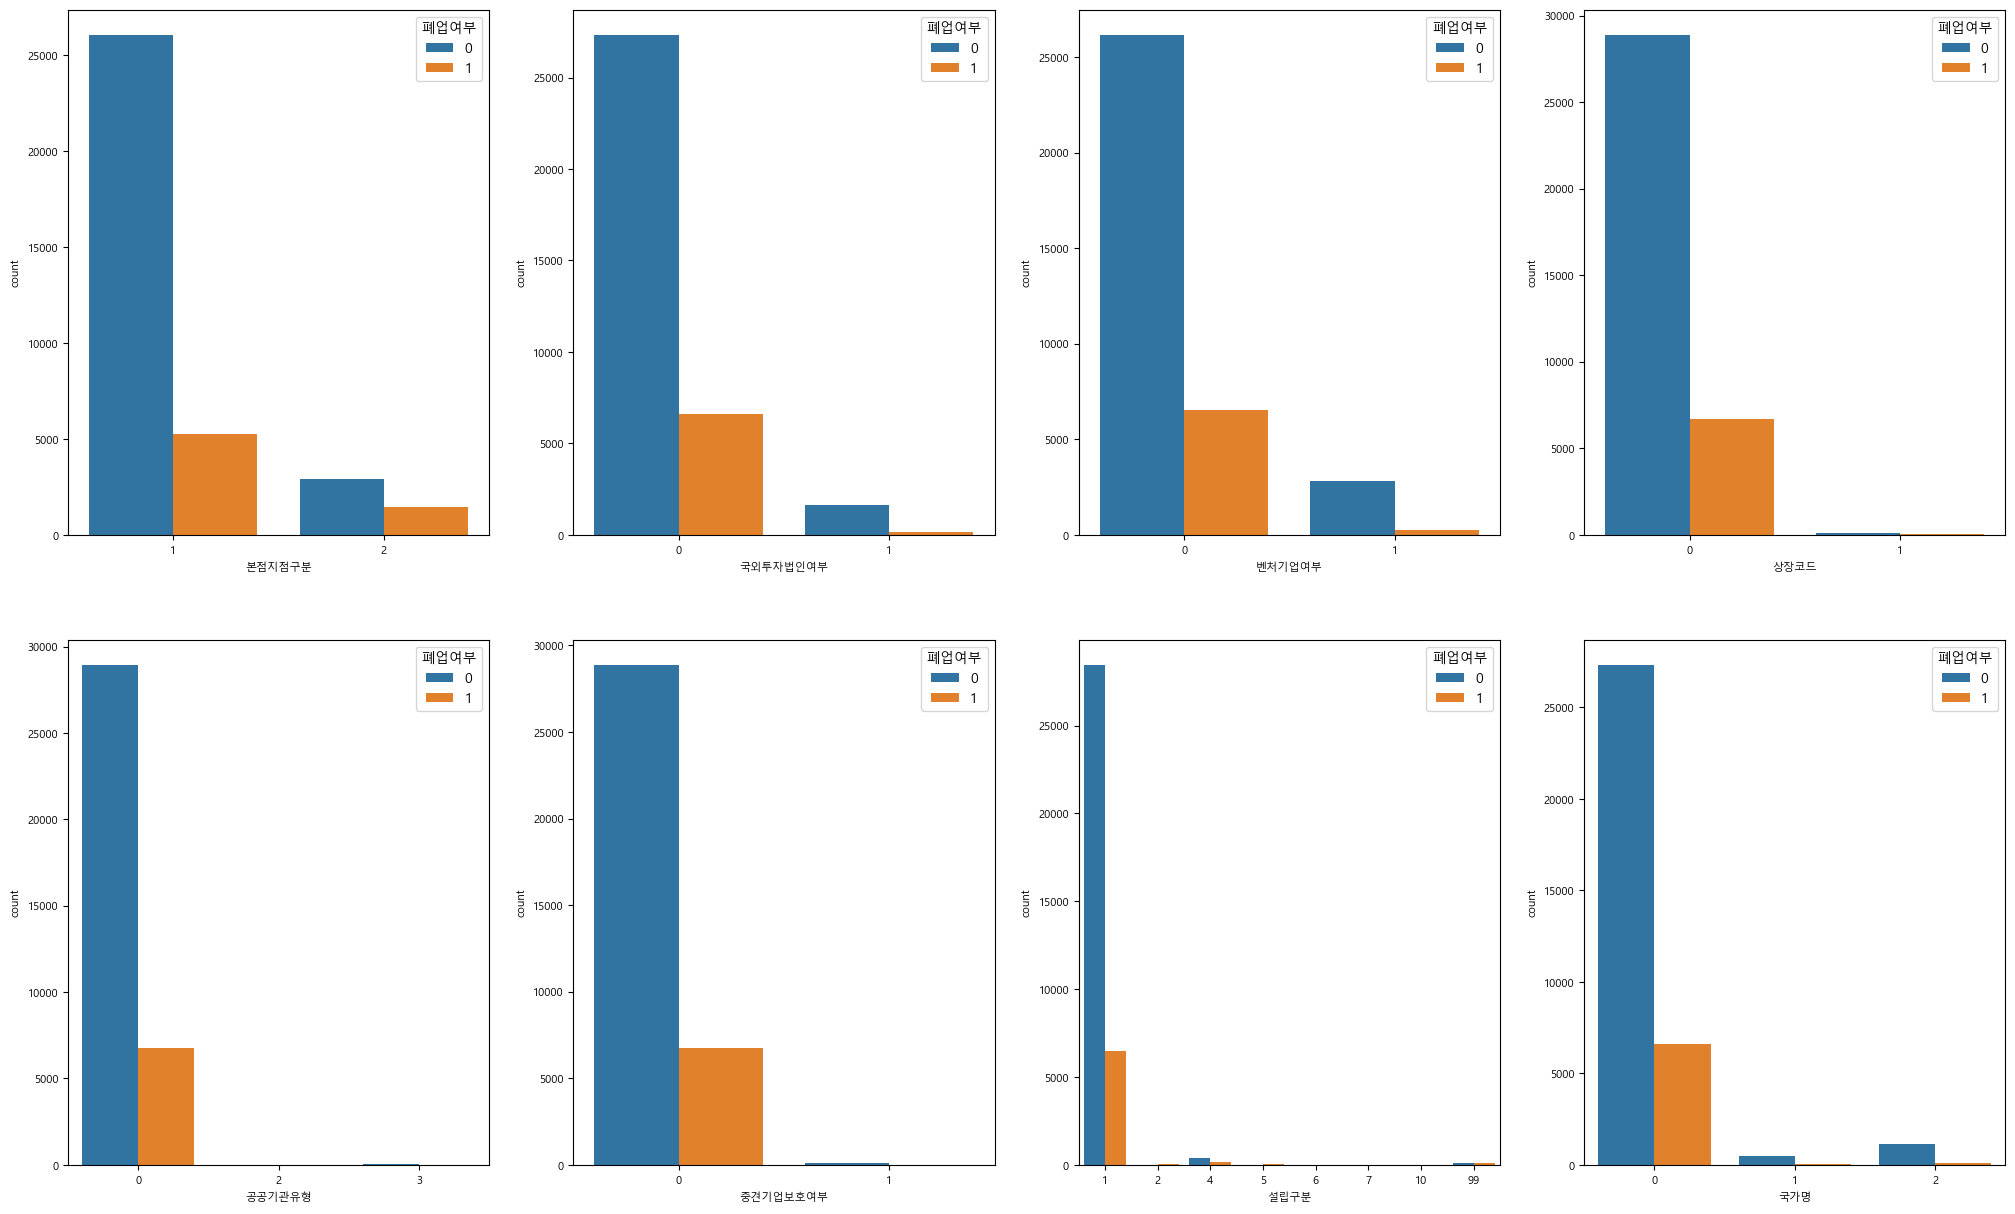

In [74]:
fig = plt.figure(figsize=(25, 15))
plt.subplot(2, 4, 1)
sns.countplot(data=final, x=final.columns[2],hue = '폐업여부')
plt.subplot(2, 4, 2)
sns.countplot(data=final, x=final.columns[3],hue = '폐업여부')
plt.subplot(2, 4, 3)
sns.countplot(data=final, x=final.columns[4],hue = '폐업여부')
plt.subplot(2, 4, 4)
sns.countplot(data=final, x=final.columns[5],hue = '폐업여부')
plt.subplot(2, 4, 5)
sns.countplot(data=final, x=final.columns[7],hue = '폐업여부')
plt.subplot(2, 4, 6)
sns.countplot(data=final, x=final.columns[8],hue = '폐업여부')
plt.subplot(2, 4, 7)
sns.countplot(data=final, x=final.columns[10],hue = '폐업여부')
plt.subplot(2, 4, 8)
sns.countplot(data=final, x=final.columns[11],hue = '폐업여부')

In [1]:
fig = plt.figure(figsize=(25, 8))
plt.subplot(2, 4, 1)
sns.histplot(data=final, x='직원수')
plt.subplot(2, 4, 2)
sns.histplot(data=final, x='구글 검색량')
plt.subplot(2, 4, 3)
sns.histplot(data=final, x='설립일자(day)')

NameError: name 'plt' is not defined

In [ ]:
fig = plt.figure(figsize=(25, 8))
plt.subplot(2, 4, 1)
sns.histplot(data=final, x='직원수',hue = '폐업여부')
plt.subplot(2, 4, 2)
sns.histplot(data=final, x='구글 검색량',hue = '폐업여부')
plt.subplot(2, 4, 3)
sns.histplot(data=final, x='설립일자(day)',hue = '폐업여부')